# **Train Object Detection Model**

#### 1. Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import xml.etree.ElementTree as xet

In [2]:
#os.chdir('/content/drive/MyDrive/Number_plate/')

In [3]:
df = pd.read_csv(r"C:\Users\jm88\Music\New folder\DataScience\SoulPageIT\DATA SCIENTIST_ASSIGNMENT-20240531T115251Z-001\DATA SCIENTIST_ASSIGNMENT\Licplatesdetection_train.csv")
df.tail()

,img_id,xmin,xmax,ymin,ymax
895,95.jpg,34,140,426,508
896,96.jpg,378,548,356,457
897,97.jpg,149,217,229,283
898,98.jpg,252,383,272,300
899,99.jpg,503,569,53,217


In [4]:
df['img_id'] = df['img_id'].apply(lambda x: x.replace('\\','/'))

In [5]:
filename = df['img_id'][0]
filename

'1.jpg'

In [6]:
root = 'image'
fnames = os.listdir(root)


In [7]:
len(fnames)

900

In [8]:
#store all file path in one list
imagepath = []
for i in range(len(fnames)):
    #print(os.path.join(root,fnames[i]))
    imagepath.append(os.path.join(root,fnames[i]))

In [9]:
imagepath[0]

'image\\1.jpg'

#### 2. Parse filename of image from XML

In [10]:
def getFilename(filename): #,images_folder=''):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join("./image",filename_image)
    return filepath_image

#### 3. verify image and output

In [14]:
file_path = imagepath[1]
file_path

'image\\10.jpg'

In [15]:
file_path = imagepath[899]
img = cv2.imread(file_path) #r"C:\Users\jm88\Music\New folder\DataScience\SoulPageIT\DATA SCIENTIST_ASSIGNMENT-20240531T115251Z-001\DATA SCIENTIST_ASSIGNMENT\license_plates_detection_train\1.jpg"
cv2.namedWindow('example',cv2.WINDOW_NORMAL)
cv2.imshow('example',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
#file_path = image_path[0]
img = cv2.imread(file_path)#r"C:\Users\jm88\Music\New folder\DataScience\SoulPageIT\DATA SCIENTIST_ASSIGNMENT-20240531T115251Z-001\DATA SCIENTIST_ASSIGNMENT\license_plates_detection_train\1.jpg")
# 395	444	311	344
#263	434	406	450
#503	569	53	217

cv2.rectangle(img,(503,53),(569,217),(0,255,0),3)
cv2.namedWindow('example',cv2.WINDOW_NORMAL)
cv2.imshow('example',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 4. **Data Preprocessing**

In [17]:
labels = df.iloc[:,1:].values
labels

array([[ 94, 169, 276, 326],
       [395, 444, 311, 344],
       [263, 434, 406, 450],
       ...,
       [149, 217, 229, 283],
       [252, 383, 272, 300],
       [503, 569,  53, 217]], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from os.path import exists

labels = df.iloc[:,1:].values
data= []
output= []
for ind in range(len(imagepath)):
    image = imagepath[ind]
    print("path of the image", image)
    file_exists = exists(image)
    if file_exists:
        print('File Exists in the path')
    else:
        print('file doesnot exists in the path')


    img_arr = cv2.imread(imagepath[ind])
    h,w,d = img_arr.shape
    # prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # normalization
    # normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # normalized output
    # -------------- append
    data.append(norm_load_image_arr)
    output.append(label_norm)

path of the image image\1.jpg
File Exists in the path
path of the image image\10.jpg
File Exists in the path
path of the image image\100.jpg
File Exists in the path
path of the image image\101.jpg
File Exists in the path
path of the image image\102.jpg
File Exists in the path
path of the image image\103.jpg
File Exists in the path
path of the image image\104.jpg
File Exists in the path
path of the image image\105.jpg
File Exists in the path
path of the image image\106.jpg
File Exists in the path
path of the image image\107.jpg
File Exists in the path
path of the image image\108.jpg
File Exists in the path
path of the image image\109.jpg
File Exists in the path
path of the image image\11.jpg
File Exists in the path
path of the image image\110.jpg
File Exists in the path
path of the image image\111.jpg
File Exists in the path
path of the image image\112.jpg
File Exists in the path
path of the image image\113.jpg
File Exists in the path
path of the image image\114.jpg
File Exists in the p

In [19]:
#data

In [20]:
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [21]:
X.shape,y.shape

((900, 224, 224, 3), (900, 4))

In [22]:
y.shape

(900, 4)

#### 5. Split data into train and test

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((720, 224, 224, 3), (180, 224, 224, 3), (720, 4), (180, 4))

### 6. Construct Deep Learning Model for Object Detection

In [24]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [25]:
inception_resnet = InceptionV3(weights="imagenet",include_top=False,
                                     input_tensor=Input(shape=(224,224,3)))
inception_resnet.trainable=False
# ---------------------
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(900,activation="relu")(headmodel)
headmodel = Dense(650,activation="relu")(headmodel)
headmodel = Dense(425,activation="relu")(headmodel)
headmodel = Dense(220,activation="relu")(headmodel)
headmodel = Dense(120,activation="relu")(headmodel)
headmodel = Dense(60,activation="relu")(headmodel)
headmodel = Dense(35,activation="relu")(headmodel)
headmodel = Dense(10,activation="relu")(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)
# ---------- model
model = Model(inputs=inception_resnet.input,outputs=headmodel)

In [26]:
# complie model
model.compile(loss='mean_squared_error', metrics = ["accuracy"],optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 68,876,048 (262.74 MB)

 Trainable params: 47,073,264 (179.57 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

### 7. Training Object Detection Model

In [27]:
from tensorflow.keras.callbacks import TensorBoard
tfb = TensorBoard('object_detection')

In [28]:
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=100,
                    validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 84s 874ms/step - accuracy: 0.3660 - loss: 0.0301 - val_accuracy: 0.5444 - val_loss: 0.0226
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 61s 852ms/step - accuracy: 0.5436 - loss: 0.0206 - val_accuracy: 0.6500 - val_loss: 0.0194
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 68s 945ms/step - accuracy: 0.6735 - loss: 0.0169 - val_accuracy: 0.6833 - val_loss: 0.0176
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 67s 932ms/step - accuracy: 0.7563 - loss: 0.0156 - val_accuracy: 0.7056 - val_loss: 0.0166
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 66s 911ms/step - accuracy: 0.8208 - loss: 0.0138 - val_accuracy: 0.7389 - val_loss: 0.0160
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 66s 912ms/step - accuracy: 0.8105 - loss: 0.0121 - val_accuracy: 0.7500 - val_loss: 0.0154
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 66s 919ms/step - accuracy: 0.8357 - loss: 0.0111 - val_accuracy: 0.7556 - val_loss: 0.0150
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 70s 971ms/step - accuracy: 0.8346 - loss: 0.0110 - 

# Accuracy get almost 98 %

In [29]:
#convert the model
model.save('my_model.keras')

<Axes: >

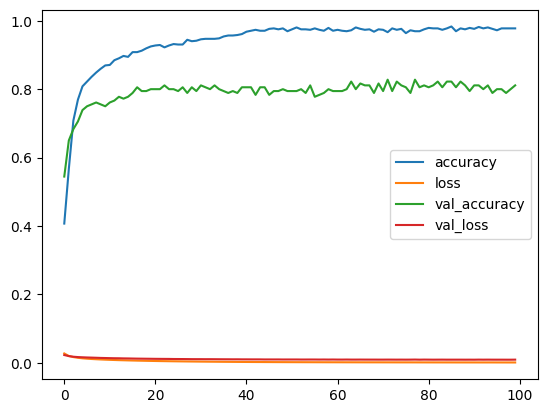

In [30]:
pd.DataFrame(history.history).plot(kind='line')

# "my_model.keras" file create we can use this as a model in any other project.

### END
---